In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('pokemon.csv')
data.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Feature Engineering 1 - Remove unwanted features

In [4]:
data = data.drop(['Name','#'],axis=1)
data.head(5)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Fire,NaN,309,39,52,43,60,50,65,1,False


# Feature Engineering 2 - Check for missing values

    - Here we see if there are any features with any missing values; none on this dataset so we are good

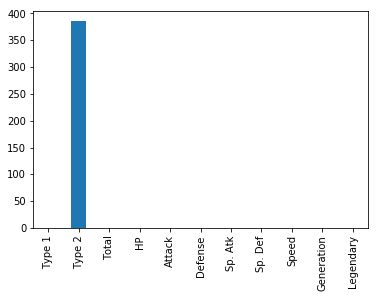

In [5]:
data.isnull().sum().plot(kind='bar')

In [6]:
# We see that type2 feature has many missing values. We will impute these values
data['Type 2'] = data['Type 2'].replace(np.NaN, 'Dummy')
data.head(5)

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,Poison,318,45,49,49,65,65,45,1,False
1,Grass,Poison,405,60,62,63,80,80,60,1,False
2,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Fire,Dummy,309,39,52,43,60,50,65,1,False


# Feature Engineering 3 - Scaling Data

    - We can see that some of the features need to be scaled as their values vary a lot and are not consistent


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data[['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation']])
scaled_data_df = pd.DataFrame(data=scaled_data, columns=['Total','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Generation'])

scaled_data_df['Type_1'] = data['Type 1']
scaled_data_df['Type_2'] = data['Type 2']
scaled_data_df['Legendary'] = data['Legendary']

scaled_data_df.head(5)

C:\MachineLearning\anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\MachineLearning\anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Type_1,Type_2,Legendary
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,-1.399637,Grass,Poison,False
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,-1.399637,Grass,Poison,False
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,-1.399637,Grass,Poison,False
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,-1.399637,Grass,Poison,False
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,-1.399637,Fire,Dummy,False


# Feature Engineering 4 - Handle Categorical features

    - Here see that there are two categorical features in the dataset.
    - Further we see that the data labels are highly imbalanced. 

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Type_1,Type_2,Legendary
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,-1.399637,Grass,Poison,1.0
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,-1.399637,Grass,Poison,1.0
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,-1.399637,Grass,Poison,1.0
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,-1.399637,Grass,Poison,1.0
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,-1.399637,Fire,Dummy,1.0


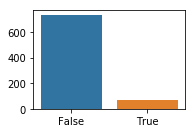

In [8]:
import seaborn as sns

plt.plot([1,2,3])
plt.subplot(221)
legendary_counts = scaled_data_df['Legendary'].value_counts()
sns.barplot(legendary_counts.index, legendary_counts.values)

# We see that for feature called 'Legendary' there are just two values so we can simple do replace
scaled_data_df['Legendary'].replace(False, 0, inplace=True)
scaled_data_df['Legendary'].replace(False, 1, inplace=True)
scaled_data_df.head()

# Feature Engineering Step 5 - Encode the Type_1 feature

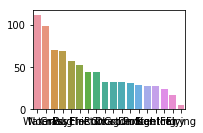

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Type_2,Legendary,...,type1-Ghost,type1-Grass,type1-Ground,type1-Ice,type1-Normal,type1-Poison,type1-Psychic,type1-Rock,type1-Steel,type1-Water
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,-1.399637,Poison,1.0,...,0,1,0,0,0,0,0,0,0,0
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,-1.399637,Poison,1.0,...,0,1,0,0,0,0,0,0,0,0
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,-1.399637,Poison,1.0,...,0,1,0,0,0,0,0,0,0,0
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,-1.399637,Poison,1.0,...,0,1,0,0,0,0,0,0,0,0
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,-1.399637,Dummy,1.0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
plt.subplot(221)
type1_counts = scaled_data_df['Type_1'].value_counts()
sns.barplot(type1_counts.index, type1_counts.values)
plt.show()

type1_encoded = pd.get_dummies(scaled_data_df['Type_1'], prefix_sep='-', prefix='type1')

type1_df = pd.DataFrame(type1_encoded)
scaled_data_df = pd.concat([scaled_data_df, type1_df],axis=1)
scaled_data_df = scaled_data_df.drop(['Type_1'],axis=1)
scaled_data_df.head()

# Feature Engineering Step 6 - Encode the Type_2 feature

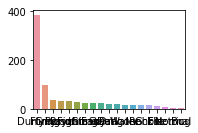

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,type1-Bug,...,type2-Ghost,type2-Grass,type2-Ground,type2-Ice,type2-Normal,type2-Poison,type2-Psychic,type2-Rock,type2-Steel,type2-Water
0,-0.976765,-0.950626,-0.924906,-0.797154,-0.239130,-0.248189,-0.801503,-1.399637,1.0,0,...,0,0,0,0,0,1,0,0,0,0
1,-0.251088,-0.362822,-0.524130,-0.347917,0.219560,0.291156,-0.285015,-1.399637,1.0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.749845,0.420917,0.092448,0.293849,0.831146,1.010283,0.403635,-1.399637,1.0,0,...,0,0,0,0,0,1,0,0,0,0
3,1.583957,0.420917,0.647369,1.577381,1.503891,1.729409,0.403635,-1.399637,1.0,0,...,0,0,0,0,0,1,0,0,0,0
4,-1.051836,-1.185748,-0.832419,-0.989683,-0.392027,-0.787533,-0.112853,-1.399637,1.0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
plt.subplot(221)
type2_counts = scaled_data_df['Type_2'].value_counts()
sns.barplot(type2_counts.index, type2_counts.values)
plt.show()

type2_encoded = pd.get_dummies(scaled_data_df['Type_2'], prefix_sep='-', prefix='type2')

type1_df = pd.DataFrame(type2_encoded)
scaled_data_df = pd.concat([scaled_data_df, type1_df],axis=1)
scaled_data_df = scaled_data_df.drop(['Type_2'],axis=1)
scaled_data_df.head()

# Dimension Reduction with PCA

In [11]:
from sklearn.decomposition import PCA

z = PCA(0.95)
pca_model = z.fit(scaled_data_df)
pca_components = pca_model.transform(scaled_data_df)

print ('Shape of original dataset ', data.shape)
print ('Shape of engineered dataset ', scaled_data_df.shape)
print ('Shape of pca components is ', pca_components.shape)
print ('Explained variance for each component is ', pca_model.explained_variance_ratio_)

Shape of original dataset  (800, 11)
Shape of engineered dataset  (800, 46)
Shape of pca components is  (800, 20)
Explained variance for each component is  [0.38594209 0.11685908 0.10272013 0.08170605 0.07590158 0.04581164
 0.02946568 0.02687937 0.01363216 0.01068604 0.00900719 0.0083257
 0.00774602 0.0069889  0.00627021 0.00548545 0.00507178 0.00488124
 0.00458706 0.00414049]


# PCA Components and their Explained Variance

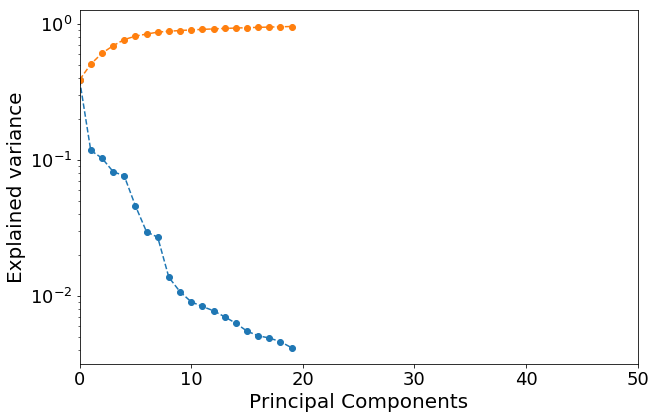

In [12]:
plt.figure(figsize=(10,6.5))
plt.semilogy(pca_model.explained_variance_ratio_,'--o')
plt.semilogy(pca_model.explained_variance_ratio_.cumsum(),'--o')
plt.xlabel('Principal Components', fontsize=20)
plt.ylabel('Explained variance', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.tick_params(axis='both', which='minor', labelsize=12)
plt.xlim([0,50])
plt.show()

# Feature Importance

    - To find out the feature importance of the reduced dataset we will use a RandomForestClassifier.
    - We will treat the 'Legendary' feature as the 'Class Variable' and then run the classification algorithm. We will print the model accuracy, f1-score and the feature importance

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

In [14]:
y = data['Legendary']
X = scaled_data_df.drop(['Legendary'], axis=1)

trainX, testX, trainY, testY = train_test_split(X,y)

classifier = RandomForestClassifier(max_features=pca_components.shape[1])
random_forest_model = classifier.fit(trainX, trainY)
modelScore = random_forest_model.score(testX, testY)
predictedY = random_forest_model.predict(testX)

C:\MachineLearning\anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [15]:
feature_importance = pd.DataFrame(classifier.feature_importances_, index=trainX.columns, columns=['importance']).sort_values('importance', ascending=False)

print ('\nModel score is ', modelScore)
c_matrix = confusion_matrix(testY, predictedY)
print (c_matrix)

print ('\nAccuracy score is ', accuracy_score(testY, predictedY))
print ('\nRecall score is ', recall_score(testY, predictedY, average='weighted'))
print ('\nPrecision score is ', precision_score(testY, predictedY, average='weighted'))
print ('\nF1 score is ', f1_score(testY, predictedY, average='weighted'))
print ('\n\nFeaturs by importance are ', feature_importance)


Model score is  0.95
[[181   5]
 [  5   9]]

Accuracy score is  0.95

Recall score is  0.95

Precision score is  0.95

F1 score is  0.95


Featurs by importance are                  importance
Total             0.401022
Sp. Atk           0.122708
Speed             0.103636
Attack            0.098135
Sp. Def           0.060152
Generation        0.053892
HP                0.039346
Defense           0.033610
type1-Psychic     0.017537
type2-Dummy       0.012062
type1-Dark        0.011217
type2-Fighting    0.007619
type1-Electric    0.006379
type2-Flying      0.004978
type1-Grass       0.004353
type1-Ground      0.004189
type2-Dragon      0.003966
type1-Steel       0.003069
type2-Dark        0.002845
type1-Water       0.002586
type2-Fire        0.002363
type2-Grass       0.002166
type1-Normal      0.001847
type1-Dragon      0.000323
type1-Ice         0.000000
type1-Fairy       0.000000
type2-Steel       0.000000
type2-Rock        0.000000
type2-Psychic     0.000000
type2-Poison      0.000

# Final Results

## Top features are
    Total             0.503738
    Sp. Atk           0.088673
    HP                0.073193
    Attack            0.062595
    Sp. Def           0.053145
    Speed             0.048519
    Generation        0.037516
    type1-Water       0.026555
    Defense           0.022391
    type2-Dummy       0.013053